In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [44]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [46]:
# Taking only 1, 2, 3 labels
targets = [1,2,3]
train_filter = np.array([i in targets for i in y_train.argmax(axis=1)])
x_train_filt = x_train[train_filter]
y_train_filt = y_train[train_filter]

test_filter = np.array([i in targets for i in y_test.argmax(axis=1)])
x_test_filt = x_test[test_filter]
y_test_filt = y_test[test_filter]

/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31378/2741647577.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


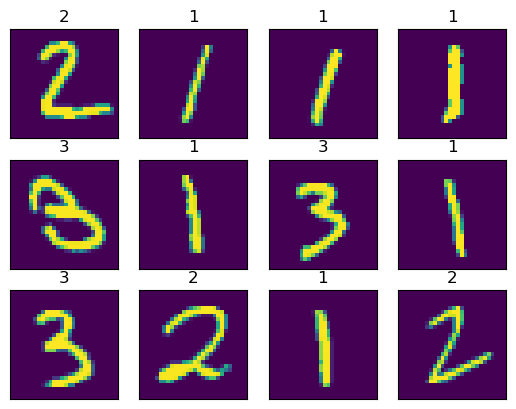

In [56]:
# import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4)
for i in np.arange(12):
    coords = np.unravel_index(i, axes.shape)
    axes[coords].pcolormesh(np.flip(x_test_filt[i].squeeze(), axis=0))
    axes[coords].set_title(y_test_filt[i].argmax())
    axes[coords].tick_params(
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False,
        bottom=False,
    )
fig.show()

In [62]:
# Taking only a small subset of the data
x_train_filt_subs = x_train_filt[:1000]
y_train_filt_subs = y_train_filt[:1000]
x_test_filt_subs = x_test_filt[:100]
y_test_filt_subs = y_test_filt[:100]

# Building the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# Training the model
batch_size = 32
epochs = 10

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(
    x_train_filt_subs,
    y_train_filt_subs,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

# Evaluating the model
y_pred = model.predict(x_test_filt_subs)
# y_pred = keras.utils.to_categorical(y_pred.argmax(axis=1), 3).astype(int)

cm = confusion_matrix(
    y_pred.argmax(axis=1),
    y_test_filt_subs.argmax(axis=1)
)
print(cm)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [109]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

a = np.random.randn(110, 30, 30, 1)
b = np.random.randn(110, 30, 30, 1) + 1
c = np.random.randn(110, 30, 30, 1) + 2

x = np.concatenate([a,b,c], axis=0)
y = np.concatenate(
    [
        np.repeat("a", a.shape[0]),
        np.repeat("b", a.shape[0]),
        np.repeat("c", a.shape[0]),
    ],
    axis=0
)
lb = LabelBinarizer()
y = lb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

# Making MLP model
model = tf.keras.Sequential([
    layers.Input(shape=(30, 30, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
    ],
)

# Show model architecture
# model.summary()

# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_split=0.2,
    verbose=True,
)

# Evaluating the model
y_pred = model.predict(X_test)
y_pred = tf.keras.utils.to_categorical(y_pred.argmax(axis=1), 3).astype(int)

cm = confusion_matrix(
    lb.inverse_transform(y_pred),
    lb.inverse_transform(y_test)
)
print(cm)
# print(classification_report(y_test, y_pred, target_names=classes))

Epoch 1/10
27/27 [==============================] - 5s 156ms/step - loss: 4.0754 - categorical_accuracy: 0.7393 - val_loss: 0.0340 - val_categorical_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 0s 9ms/step - loss: 0.0078 - categorical_accuracy: 1.0000 - val_loss: 3.7668e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 1.2498e-04 - categorical_accuracy: 1.0000 - val_loss: 5.0598e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 4.3498e-05 - categorical_accuracy: 1.0000 - val_loss: 3.6929e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 3.6471e-05 - categorical_accuracy: 1.0000 - val_loss: 3.3071e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: 3.2781e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0166e-05 - val_categor